In [18]:
# Importing libraries
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [19]:
df = pd.read_csv('archive/Disease_symptom_and_patient_profile_dataset.csv')

In [20]:
df.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive


In [21]:
df.tail()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
344,Stroke,Yes,No,Yes,No,80,Female,High,High,Positive
345,Stroke,Yes,No,Yes,No,85,Male,High,High,Positive
346,Stroke,Yes,No,Yes,No,85,Male,High,High,Positive
347,Stroke,Yes,No,Yes,No,90,Female,High,High,Positive
348,Stroke,Yes,No,Yes,No,90,Female,High,High,Positive


In [22]:
df.size

3490

In [23]:
df.shape

(349, 10)

In [24]:
df.columns

Index(['Disease', 'Fever', 'Cough', 'Fatigue', 'Difficulty Breathing', 'Age',
       'Gender', 'Blood Pressure', 'Cholesterol Level', 'Outcome Variable'],
      dtype='object')

In [25]:
df['Outcome Variable'].unique()

array(['Positive', 'Negative'], dtype=object)

In [26]:
df['Disease'].unique()

array(['Influenza', 'Common Cold', 'Eczema', 'Asthma', 'Hyperthyroidism',
       'Allergic Rhinitis', 'Anxiety Disorders', 'Diabetes',
       'Gastroenteritis', 'Pancreatitis', 'Rheumatoid Arthritis',
       'Depression', 'Liver Cancer', 'Stroke', 'Urinary Tract Infection',
       'Dengue Fever', 'Hepatitis', 'Kidney Cancer', 'Migraine',
       'Muscular Dystrophy', 'Sinusitis', 'Ulcerative Colitis',
       'Bipolar Disorder', 'Bronchitis', 'Cerebral Palsy',
       'Colorectal Cancer', 'Hypertensive Heart Disease',
       'Multiple Sclerosis', 'Myocardial Infarction (Heart...',
       'Urinary Tract Infection (UTI)', 'Osteoporosis', 'Pneumonia',
       'Atherosclerosis', 'Chronic Obstructive Pulmonary...', 'Epilepsy',
       'Hypertension', 'Obsessive-Compulsive Disorde...', 'Psoriasis',
       'Rubella', 'Cirrhosis', 'Conjunctivitis (Pink Eye)',
       'Liver Disease', 'Malaria', 'Spina Bifida', 'Kidney Disease',
       'Osteoarthritis', 'Klinefelter Syndrome', 'Acne', 'Brain Tumor',


In [27]:
from sklearn.preprocessing import LabelEncoder


# Sample code to label encode a single categorical column
label_encoder = LabelEncoder()

# Fit label encoder and transform the categorical column
df['Cholesterol Level'] = label_encoder.fit_transform(df['Cholesterol Level'])
df['Blood Pressure'] = label_encoder.fit_transform(df['Blood Pressure'] )
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Difficulty Breathing'] = label_encoder.fit_transform(df['Difficulty Breathing'])
df['Fatigue'] = label_encoder.fit_transform(df['Fatigue'])
df['Cough'] = label_encoder.fit_transform(df['Cough'])
df['Fever'] = label_encoder.fit_transform(df['Fever'])
df['Disease'] = label_encoder.fit_transform(df['Disease'])

In [28]:
df

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,56,1,0,1,1,19,0,1,2,Positive
1,24,0,1,1,0,25,0,2,2,Negative
2,37,0,1,1,0,25,0,2,2,Negative
3,6,1,1,0,1,25,1,2,2,Positive
4,6,1,1,0,1,25,1,2,2,Positive
...,...,...,...,...,...,...,...,...,...,...
344,101,1,0,1,0,80,0,0,0,Positive
345,101,1,0,1,0,85,1,0,0,Positive
346,101,1,0,1,0,85,1,0,0,Positive
347,101,1,0,1,0,90,0,0,0,Positive


In [29]:
df.dtypes

Disease                  int32
Fever                    int32
Cough                    int32
Fatigue                  int32
Difficulty Breathing     int32
Age                      int64
Gender                   int32
Blood Pressure           int32
Cholesterol Level        int32
Outcome Variable        object
dtype: object

In [30]:
df['Outcome Variable'].value_counts()

Positive    186
Negative    163
Name: Outcome Variable, dtype: int64

<AxesSubplot:>

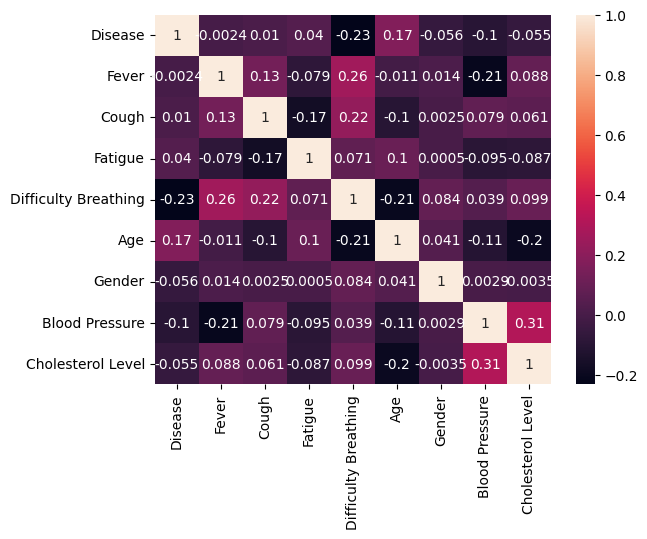

In [31]:
sns.heatmap(df.corr(),annot=True)

### Seperating features and target label

In [32]:
features = df[['Fever','Cough','Fatigue', 'Difficulty Breathing', 'Age', 'Gender','Blood Pressure','Cholesterol Level']]
target = df['Disease']
labels = df['Disease']

In [33]:
# Initialzing empty lists to append all model's name and corresponding name
acc = []
model = []

In [34]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

# Decision Tree

In [35]:
from sklearn.tree import DecisionTreeClassifier

decisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

decisionTree.fit(Xtrain,Ytrain)

predicted_values = decisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  10.0
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.43      1.00      0.60         3
           8       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         1
          13       0.20      0.50      0.29         2
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1
          22       0.00      0.00      0.00         1
          24       0.00      0.00      0.00         1
          26       0.00      0.00      0.00         0
          27       0.00      0.00      0.00         1
          29       0.00      0.00      0.00         1
          30       0.00      0.00      0.00         0
          31       0.00      0.00      0.00   

In [36]:
from sklearn.model_selection import cross_val_score

In [37]:
# Cross validation score (Decision Tree)
score = cross_val_score(decisionTree, features, target,cv=5)

In [38]:
score

array([0.08571429, 0.08571429, 0.07142857, 0.1       , 0.05797101])

### Saving trained Decision Tree model

In [39]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
DT_pkl_filename = 'DecisionTree.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(decisionTree, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

# Guassian Naive Bayes

In [40]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.07142857142857142
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         2
          16       1.00      1.00      1.00         1
          17       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         0
          22       0.00      0.00      0.00         1
          24       0.00      0.00      0.00         1
          27       0.17      1.00      0.29         1
          29       0.00      0.00      0.00         1
          31       0.00      0.00      0.00         3
          32       0.00      0.00

In [41]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([0.1       , 0.14285714, 0.2       , 0.14285714, 0.11594203])

### Saving trained Guassian Naive Bayes model

In [42]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
NB_pkl_filename = 'NBClassifier.pkl'
# Open the file to save as pkl file
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)
# Close the pickle instances
NB_Model_pkl.close()

# Support Vector Machine (SVM)

In [43]:
from sklearn.svm import SVC
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
norm = MinMaxScaler().fit(Xtrain)
X_train_norm = norm.transform(Xtrain)
# transform testing dataabs
X_test_norm = norm.transform(Xtest)
SVM = SVC(kernel='poly', degree=3, C=1)
SVM.fit(X_train_norm,Ytrain)
predicted_values = SVM.predict(X_test_norm)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  0.1
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.30      1.00      0.46         3
           8       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1
          22       0.00      0.00      0.00         1
          24       0.00      0.00      0.00         1
          27       0.00      0.00      0.00         1
          28       0.00      0.00      0.00         0
          29       0.00      0.00      0.00         1
          30       0.00      0.00      0.00         0
          31       0.00      0.00      0.00         3
   

In [44]:
# Cross validation score (SVM)
score = cross_val_score(SVM,features,target,cv=5)
score

array([0.07142857, 0.1       , 0.14285714, 0.1       , 0.07246377])

In [45]:
#Saving trained SVM model

In [46]:
import pickle
# Dump the trained SVM classifier with Pickle
SVM_pkl_filename = 'SVMClassifier.pkl'
# Open the file to save as pkl file
SVM_Model_pkl = open(SVM_pkl_filename, 'wb')
pickle.dump(SVM, SVM_Model_pkl)
# Close the pickle instances
SVM_Model_pkl.close()

# Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.07142857142857142
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.25      1.00      0.40         3
           8       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         0
          22       0.00      0.00      0.00         1
          24       0.00      0.00      0.00         1
          27       0.00      0.00      0.00         1
          29       0.00      0.00      0.00         1
          30       0.00      0.00      0.00         0
          31       0.00      0.00      0.00         3
          32       0.00  

In [48]:
# Cross validation score (Logistic Regression)
score = cross_val_score(LogReg,features,target,cv=5)
score

array([0.07142857, 0.07142857, 0.08571429, 0.08571429, 0.08695652])

### Saving trained Logistic Regression model

In [49]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
LR_pkl_filename = 'LogisticRegression.pkl'
# Open the file to save as pkl file
LR_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(LogReg, LR_Model_pkl)
# Close the pickle instances
LR_Model_pkl.close()

# Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.11428571428571428
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.27      1.00      0.43         3
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         2
          16       1.00      1.00      1.00         1
          17       0.00      0.00      0.00         1
          22       0.00      0.00      0.00         1
          24       0.00      0.00      0.00         1
          26       0.00      0.00      0.00         0
          27       0.00      0.00      0.00         1
          29       0.00      0.00      0.00         1
          31       0.00      0.00      0.0

In [51]:
# Cross validation score (Random Forest)
score = cross_val_score(RF,features,target,cv=5)
score

array([0.24285714, 0.32857143, 0.25714286, 0.24285714, 0.2173913 ])

### Saving trained Random Forest model

In [52]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
RF_pkl_filename = 'RandomForest.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

## Accuracy Comparison

<AxesSubplot:title={'center':'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

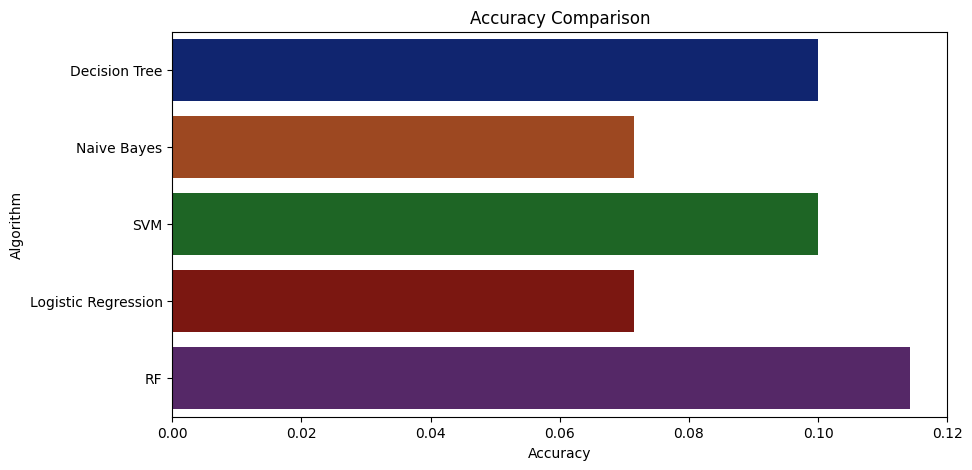

In [53]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [54]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 0.1
Naive Bayes --> 0.07142857142857142
SVM --> 0.1
Logistic Regression --> 0.07142857142857142
RF --> 0.11428571428571428


In [55]:
data=[['1', '0','1','1', '50', '1', '0','1']]


In [56]:
prediction = RF.predict(data)

In [57]:
print(prediction)

[77]
